In [8]:
import os
import earthpy as et
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import h5py

In [40]:
file = '/Users/jwitte/earth-analytics/data/capstone/smap/SMAP_L3_SM_P_E_20150514_R17000_002.h5'
#file = '/Users/jwitte/earth-analytics/data/capstone/smap/SMAP_L3_SM_P_E_20150705_R17000_002.h5'

f = h5py.File(file, 'r')

In [41]:
print("Now lets look at the groups within the file to access:")
i=0;
for key in f.keys():
    print(str(i)+ '\t'+key)
    i+=1
group_id=list(f.keys())[1];# < Lets focus on the AM overpass for this example
print('\n')
i=0
print("Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:")
for var in list(f[group_id].keys()):
    print(str(i)+'\t'+var)
    i+=1

Now lets look at the groups within the file to access:
0	Metadata
1	Soil_Moisture_Retrieval_Data_AM
2	Soil_Moisture_Retrieval_Data_PM


Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:
0	EASE_column_index
1	EASE_row_index
2	albedo
3	albedo_dca
4	albedo_scah
5	albedo_scav
6	boresight_incidence
7	bulk_density
8	clay_fraction
9	freeze_thaw_fraction
10	grid_surface_status
11	latitude
12	latitude_centroid
13	longitude
14	longitude_centroid
15	radar_water_body_fraction
16	retrieval_qual_flag
17	retrieval_qual_flag_dca
18	retrieval_qual_flag_scah
19	retrieval_qual_flag_scav
20	roughness_coefficient
21	roughness_coefficient_dca
22	roughness_coefficient_scah
23	roughness_coefficient_scav
24	soil_moisture
25	soil_moisture_dca
26	soil_moisture_error
27	soil_moisture_scah
28	soil_moisture_scav
29	static_water_body_fraction
30	surface_flag
31	surface_temperature
32	surface_water_fraction_mb_h
33	surface_water_fraction_mb_v
34	tb_3_co

In [42]:
print('the data has a shape of: '+str(f[group_id][list(f[group_id].keys())[0]].shape))

the data has a shape of: (1624, 3856)


In [43]:
var_id = list(f[group_id].keys())[16] # soil_moisture
sm_data = f[group_id][var_id][:,:]
sm_ds = f[group_id][var_id]
print('data are returned as '+str(type(sm_data)) + ' something easy to work with in python.')

data are returned as <class 'numpy.ndarray'> something easy to work with in python.


(-0.5, 3855.5, 1623.5, -0.5)

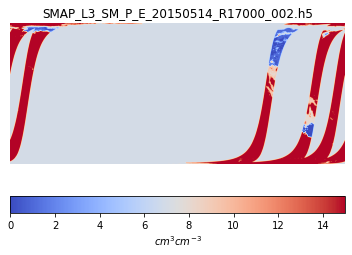

In [48]:
plt.imshow(sm_data, cmap='coolwarm')
plt.title(os.path.basename(file))
cbar = plt.colorbar(orientation = 'horizontal')
cbar.set_label('$cm^3 cm^{-3}$')
plt.axis('off')

In [15]:
print(f[group_id][var_id].attrs['_FillValue'])

65534


In [19]:
# sm_data[sm_data==f[group_id][var_id].attrs['_FillValue']]=np.nan